  Proyek UAS PMDPM

<b>Harap jangan menghapus cell dan komentar yang diberikan!</b>

Setiap cell markdown dan code akan berisi instruksi pengerjaan Proyek UAS PMDPM

Dalam notebook ini Anda akan diminta untuk membuat sebuah proyek Pembelajaran Mesin menggunakan dataset yang sudah disediakan. Proyek akan terdiri dari proses inisialisasi, data loading, data cleansing, feature engineering, modelling dan evaluasi model. Pada bagian akhir silahkan berikan laporan singkat dari proyek yang sudah dikerjakan.

## Penjelasan Tugas

Terapkan pemrosesan dataset dari loading, data cleansing (jika perlu), data scaling, feature selection, hingga evaluasi model secara sederhana menggunakan code yang sudah dipelajari dalam latihan-latihan dan tugas.

### Inisialisasi

Bagian berikut berisi import library yang dibutuhkan.

In [1]:
# from google.colab import files

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

import warnings

warnings.filterwarnings('ignore')

### Data Loading

Bagian berikut berisi proses data loading (boleh dengan file upload atau dengan mount drive), jangan lupa tampilkan 20 baris data teratas!

In [2]:
# Loading data yang akan diolah
# uploaded = files.upload()
df = pd.read_csv("paris_housing2000.csv")
df.head(20)

,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,3,4,1995,N,Y,3114,1258,264,Y,9,10313.5,Basic
1,9,1,2011,N,Y,9390,6219,922,N,9,13229.1,Basic
2,1,4,2003,Y,N,2239,2795,951,Y,7,14431.3,Basic
3,6,2,1990,N,N,6861,5769,442,N,5,15488.0,Basic
4,6,9,1992,Y,Y,6618,7045,939,Y,10,16799.2,Basic
5,5,2,2010,Y,N,4426,5336,911,N,4,17071.0,Basic
6,4,3,1990,Y,N,6022,8521,391,Y,3,17363.0,Basic
7,6,3,2000,N,N,2325,6230,536,N,9,18985.0,Basic
8,2,2,2020,N,Y,8598,3119,268,N,10,19638.0,Basic
9,7,6,1995,N,Y,2675,6452,724,Y,2,19788.5,Basic


In [3]:
# Bersihkan dataset menggunakan metode yang sudah dipelajari
df.drop(['cityPartRange'], axis=1, inplace=True)
df.drop(['price'], axis=1, inplace=True)
df.head(10)

,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,category
0,4,1995,N,Y,3114,1258,264,Y,9,Basic
1,1,2011,N,Y,9390,6219,922,N,9,Basic
2,4,2003,Y,N,2239,2795,951,Y,7,Basic
3,2,1990,N,N,6861,5769,442,N,5,Basic
4,9,1992,Y,Y,6618,7045,939,Y,10,Basic
5,2,2010,Y,N,4426,5336,911,N,4,Basic
6,3,1990,Y,N,6022,8521,391,Y,3,Basic
7,3,2000,N,N,2325,6230,536,N,9,Basic
8,2,2020,N,Y,8598,3119,268,N,10,Basic
9,6,1995,N,Y,2675,6452,724,Y,2,Basic


### Data Visualization

Dalam proses visualisasi data, silahkan visualisasikan feature menggunakan plot yang sesuai agar mendapat insight dari data dengan menjawab pertanyaan-pertanyaan berikut:

    untuk sub A:
    1. Bagaimana perbandingan median luas basement rumah berdasarkan tipe rumahnya (Basic dan Luxury)?
    2. Bagaimana komposisi jumlah rumah yang baru dibangun atau tidak pada tipe rumah Luxury?
   

    untuk sub B:
    1. Bagaimana perbandingan median luas loteng rumah berdasarkan tipe rumahnya (Basic dan Luxury)
    2. Bagaimana komposisi jumlah rumah yang memiliki pelindung badai atau tidak pada tipe rumah Basic?
   

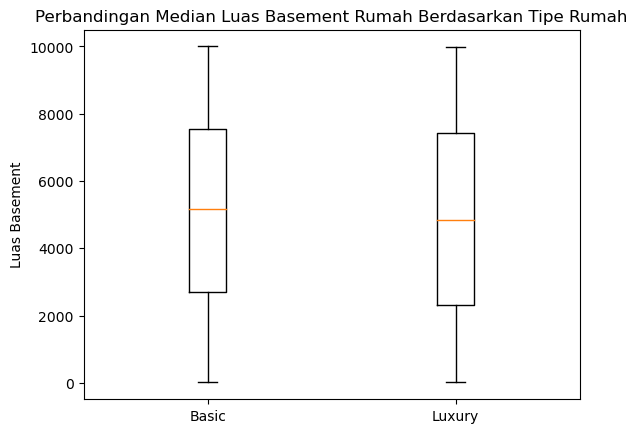

Median luas basement rumah tipe Basic adalah 5170.0
Median luas basement rumah tipe Luxury adalah 4847.5


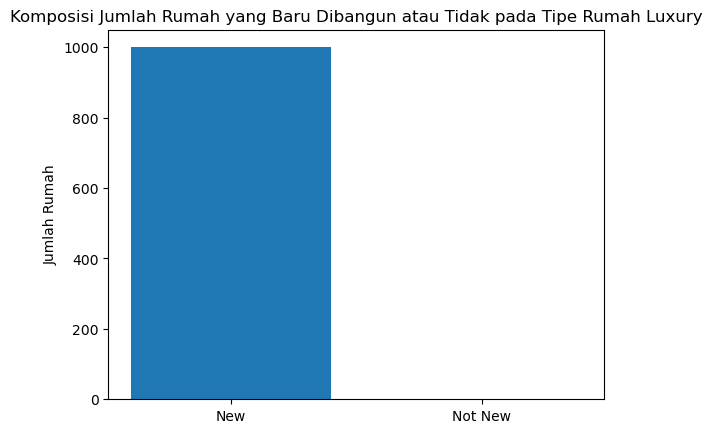

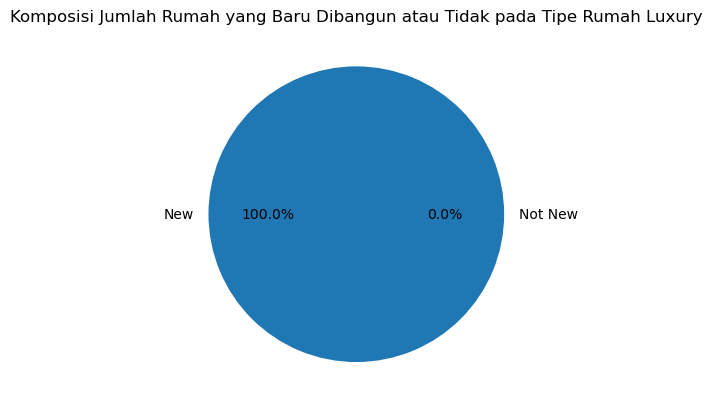

Jumlah rumah yang baru dibangun pada tipe rumah Luxury adalah 1000
Jumlah rumah yang tidak baru dibangun pada tipe rumah Luxury adalah 0


In [4]:
## Visualisasi fitur menggunakan metode yang sudah dipelajari

# Bagaimana perbandingan median luas basement rumah berdasarkan tipe rumahnya (Basic dan Luxury)?
plt.boxplot([df[df['category'] == 'Basic']['basement'], df[df['category'] == 'Luxury']['basement']],
            labels=['Basic', 'Luxury'])
plt.title('Perbandingan Median Luas Basement Rumah Berdasarkan Tipe Rumah')
plt.ylabel('Luas Basement')
plt.show()

basic = df[df['category'] == 'Basic']['basement'].median()
luxury = df[df['category'] == 'Luxury']['basement'].median()

print('Median luas basement rumah tipe Basic adalah', basic)
print('Median luas basement rumah tipe Luxury adalah', luxury)

# Bagaimana komposisi jumlah rumah yang baru dibangun atau tidak pada tipe rumah Luxury?
total_new = total_not_new = 0
for i in df[df['category'] == 'Luxury']['isNewBuilt']:
    if i == "Y":
        total_new += 1
    else:
        total_not_new += 1

plt.bar(['New', 'Not New'], [total_new, total_not_new])
plt.title('Komposisi Jumlah Rumah yang Baru Dibangun atau Tidak pada Tipe Rumah Luxury')
plt.ylabel('Jumlah Rumah')
plt.show()

plt.pie([total_new, total_not_new], labels=['New', 'Not New'], autopct='%1.1f%%')
plt.title('Komposisi Jumlah Rumah yang Baru Dibangun atau Tidak pada Tipe Rumah Luxury')
plt.show()

print('Jumlah rumah yang baru dibangun pada tipe rumah Luxury adalah', total_new)
print('Jumlah rumah yang tidak baru dibangun pada tipe rumah Luxury adalah', total_not_new)

### Deskripsi Data Visualization
Berikan keterangan atau deskripsi singkat mengenai informasi yang diperoleh dari visualisasi data tersebut. Jawablah pertanyaan di atas pada cell markdown ini!

1. Bagaimana perbandingan median luas basement rumah berdasarkan tipe rumahnya (Basic dan Luxury)?
[ Median luas basement rumah tipe Basic lebih besar daripada median luas basement rumah tipe Luxury dengan selisih 326.5. ]

2. Bagaimana komposisi jumlah rumah yang baru dibangun atau tidak pada tipe rumah Luxury?
[ Jumlah rumah yang baru dibangun pada tipe rumah Luxury semuanya berjumlah 1000 dan tidak ada rumah yang tidak baru dibangun pada tipe rumah Luxury. ]

### Data Cleansing

Bagian berikut berisi proses pembersihan data (jika diperlukan, minimal cek apakah ada data yang kosong atau duplikat). Drop feature yang berlaku sebagai unique identifier (CityCode) dan drop feature Price. Lakukan OneHotEncoder untuk data kategorik string. Pisahkan juga label dengan feature!

### Train-test split

> Untuk sub A: random_state train_test_split gunakan 2 digit terakhir NPM terbesar di sub kelompok  

> Untuk sub B: random_state train_test_split gunakan 2 digit terakhir NPM terkecil di sub kelompok

In [5]:
# Check null and duplicate values
print("[ Data yang kosong : ]")
print(df.isnull().sum())
print()
print("[ Data yang duplikat : ]")
print(df.duplicated().sum())

[ Data yang kosong : ]
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
category             0
dtype: int64

[ Data yang duplikat : ]
0


In [6]:
# Train-test split
NPM1 = "210711385"
NPM2 = "210711453"
HIGHEST_LAST_2_DIGITS_NPM = max(int(NPM1[-2:]), int(NPM2[-2:]))

X = df.drop(columns=['category'], axis=1)
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=HIGHEST_LAST_2_DIGITS_NPM)

In [7]:
# One Hot Encoding untuk data kategorik string
columns = [col for col in df.columns if df[col].dtype == 'object' and col != 'category']
transformer = make_column_transformer((OneHotEncoder(), columns), remainder="passthrough")

X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

df_train_enc = pd.DataFrame(X_train, columns=transformer.get_feature_names_out())
df_test_enc = pd.DataFrame(X_test, columns=transformer.get_feature_names_out())

### Modelling

Gunakan Pipeline untuk modelling dan grid search cross-validation untuk pemilihan model terbaik. Gunakan Stratified K-fold Cross Validation dengan nilai n_splits=5. Pipeline terdiri atas data scaling, feature selection, dan classifier. Buatlah 2 Pipeline dan 2 GridSearchCV untuk masing-masing kombinasi berikut.

>Step data scaling untuk membandingkan perlunya data scaling atau tidak. Gunakan dua nilai pada parameter grid yaitu: [None,Scaler]. Untuk sub A: gunakan StandardScaler. Untuk sub B: gunakan MinMaxScaler

>Step feature selection untuk membandingkan metode feature selection yang digunakan. Gunakan dua metode pada parameter grid yaitu: [None,Selector]. Untuk sub A: gunakan SelectKBest dengan ketentuan k minimal 2, maksimal n-1. Untuk sub B: gunakan SelectPercentile dengan ketentuan persentil minimal 30%, maksimal 80%. Kalian juga perlu melakukan setting parameter grid nilai k atau percentile-nya.

>Step classifier untuk membandingkan algoritme classifier. Eksplorasi pengaturan parameter yang ada pada algoritme yang akan Anda gunakan, tidak terbatas pada 1-2 parameter saja supaya optimal (selain random_state). Silahkan bereksperimen untuk parameter seperti n_estimators, max_depth untuk tree-based classifier; C untuk Logistic Regression; dan C, gamma, serta kernel untuk SVM agar mendapat akurasi terbaik.

> Sub A: RandomForestClassifier(n_estimators=bebas minimal 50, random_state= dua digit terakhir NPM terbesar dalam sub kelompok, max_depth=bebas, criterion='entropy') dan LogisticRegression(C=bebas, max_iter=10000, class_weight='balanced')

> Sub B: K-Nearest Neighbors(n_neighbors=bebas, weights='distance') dan SVC(C=bebas, gamma=bebas, class_weight='balanced')

>Tampilkan best estimator dan nilai best score dari kedua grid-search cross-validation. Fit best estimator pada train set kemudian ujikan pada test set dengan fungsi score. Format score 3 digit di belakang koma (.3f).

In [8]:
### Cell code ini untuk proses pembuatan model pipeline & grid search 1

## Pipeline 1
pipe1 = [('Data Scaling', StandardScaler()),
         ('Feature Selection', SelectKBest()),
         ('Random Forest', RandomForestClassifier())]

estimators1 = Pipeline(pipe1)
estimators1.fit(X_train, y_train)
estimators1_test_score = estimators1.score(X_test, y_test)
print("Estimator test score: %.3f" % estimators1_test_score)

## Grid Search 1
params_grid1 = {
    'Data Scaling': [None, StandardScaler()],
    'Feature Selection__k': list(range(2, len(df_train_enc.columns) - 1)),
    'Random Forest__n_estimators': [50, 100, 150, 200],
    'Random Forest__max_depth': [None, 5, 10, 15],
    'Random Forest__criterion': ['entropy'],
    'Random Forest__random_state': [HIGHEST_LAST_2_DIGITS_NPM]
}

GSCV3_1 = GridSearchCV(estimators1, param_grid=params_grid1, cv=StratifiedKFold(n_splits=5))
GSCV3_1.fit(X_train, y_train)

GStest_score1 = GSCV3_1.score(X_test, y_test)
print("Test score: %.3f" % GStest_score1)
print("Best score: %.3f" % GSCV3_1.best_score_)
print("Best params:", GSCV3_1.best_params_)
print("Best estimator:", GSCV3_1.best_estimator_)

if GSCV3_1.best_estimator_.named_steps['Feature Selection'] is not None:
    mask1 = GSCV3_1.best_estimator_.named_steps['Feature Selection'].get_support()
    selected_features1 = df_train_enc.columns[mask1]
    print("Total selected features:", len(selected_features1))
    print("Selected features:", selected_features1)

Estimator test score: 0.780
Test score: 0.785
Best score: 0.784
Best params: {'Data Scaling': None, 'Feature Selection__k': 3, 'Random Forest__criterion': 'entropy', 'Random Forest__max_depth': 5, 'Random Forest__n_estimators': 100, 'Random Forest__random_state': 85}
Best estimator: Pipeline(steps=[('Data Scaling', None), ('Feature Selection', SelectKBest(k=3)),
                ('Random Forest',
                 RandomForestClassifier(criterion='entropy', max_depth=5,
                                        random_state=85))])
Total selected features: 3
Selected features: Index(['onehotencoder__isNewBuilt_N', 'onehotencoder__isNewBuilt_Y',
       'remainder__attic'],
      dtype='object')


In [9]:
### Cell code ini untuk proses pembuatan model pipeline & grid search 2

## Pipeline 2
pipe2 = [('Data Scaling', StandardScaler()),
         ('Feature Selection', SelectKBest()),
         ('Logistic Regression', LogisticRegression())]

estimators2 = Pipeline(pipe2)
estimators2.fit(X_train, y_train)
estimators2_test_score = estimators2.score(X_test, y_test)
print("Estimator test score: %.3f" % estimators2_test_score)

## Grid Search 2
params_grid2 = {
    'Data Scaling': [None, StandardScaler()],
    'Feature Selection__k': list(range(2, len(df_train_enc.columns) - 1)),
    'Logistic Regression__C': np.arange(0.001, 10, 1).tolist(),
    'Logistic Regression__max_iter': [10_000],
    'Logistic Regression__class_weight': ['balanced']
}

GSCV3_2 = GridSearchCV(estimators2, param_grid=params_grid2, cv=StratifiedKFold(n_splits=5))
GSCV3_2.fit(X_train, y_train)

GStest_score2 = GSCV3_2.score(X_test, y_test)
print("Test score: %.3f" % GStest_score2)
print("Best score: %.3f" % GSCV3_2.best_score_)
print("Best params:", GSCV3_2.best_params_)
print("Best estimator:", GSCV3_2.best_estimator_)

if GSCV3_2.best_estimator_.named_steps['Feature Selection'] is not None:
    mask2 = GSCV3_2.best_estimator_.named_steps['Feature Selection'].get_support()
    selected_features2 = df_train_enc.columns[mask2]
    print("Total selected features:", len(selected_features2))
    print("Selected features:", selected_features2)


Estimator test score: 0.787
Test score: 0.787
Best score: 0.786
Best params: {'Data Scaling': None, 'Feature Selection__k': 10, 'Logistic Regression__C': 1.001, 'Logistic Regression__class_weight': 'balanced', 'Logistic Regression__max_iter': 10000}
Best estimator: Pipeline(steps=[('Data Scaling', None), ('Feature Selection', SelectKBest()),
                ('Logistic Regression',
                 LogisticRegression(C=1.001, class_weight='balanced',
                                    max_iter=10000))])
Total selected features: 10
Selected features: Index(['onehotencoder__isNewBuilt_N', 'onehotencoder__isNewBuilt_Y',
       'onehotencoder__hasStormProtector_N',
       'onehotencoder__hasStormProtector_Y', 'onehotencoder__hasStorageRoom_Y',
       'remainder__numPrevOwners', 'remainder__made', 'remainder__basement',
       'remainder__attic', 'remainder__hasGuestRoom'],
      dtype='object')


### Evaluasi Model

Bagian berikut berisi evaluasi model menggunakan classification report dan skor AUC. Tampilkan classification report dan AUC dari best estimator yang diperoleh masing-masing grid search!

In [10]:
### Lakukan proses evaluasi model algoritme pembelajaran mesin

## Evaluasi model 1
print("[ Model 1 ]")
# Classification Report
gs_pred1 = GSCV3_1.predict(X_test)
print("Confusion matrix:", confusion_matrix(y_test, gs_pred1))
print("Classification report:", classification_report(y_test, gs_pred1))

# AUC
gs_pred_proba1 = GSCV3_1.predict_proba(X_test)
print("AUC score: %.3f" % roc_auc_score(y_test, gs_pred_proba1[:, 1]))

print()
print("----------------------------------------------")
print()

## Evaluasi model 2
print("[ Model 2 ]")
# Classification Report
gs_pred2 = GSCV3_2.predict(X_test)
print("Confusion matrix:", confusion_matrix(y_test, gs_pred2))
print("Classification report:", classification_report(y_test, gs_pred2))

# AUC
gs_pred_proba2 = GSCV3_2.predict_proba(X_test)
print("AUC score: %.3f" % roc_auc_score(y_test, gs_pred_proba2[:, 1]))

[ Model 1 ]
Confusion matrix: [[176 128]
 [  1 295]]
Classification report:               precision    recall  f1-score   support

       Basic       0.99      0.58      0.73       304
      Luxury       0.70      1.00      0.82       296

    accuracy                           0.79       600
   macro avg       0.85      0.79      0.78       600
weighted avg       0.85      0.79      0.78       600

AUC score: 0.792

----------------------------------------------

[ Model 2 ]
Confusion matrix: [[176 128]
 [  0 296]]
Classification report:               precision    recall  f1-score   support

       Basic       1.00      0.58      0.73       304
      Luxury       0.70      1.00      0.82       296

    accuracy                           0.79       600
   macro avg       0.85      0.79      0.78       600
weighted avg       0.85      0.79      0.78       600

AUC score: 0.797


## Kesimpulan

Silahkan jawab pertanyaan berikut:

1. Apa saja feature-feature yang penting untuk membedakan antara rumah basic dan luxury? 

2. Model apakah yang memiliki performa paling baik terhadap dataset? Apakah parameter setting yang paling optimal dari model tersebut?

*Tulis jawaban Anda di cell ini*
1. ['onehotencoder__isNewBuilt_N', 'onehotencoder__isNewBuilt_Y',
       'onehotencoder__hasStormProtector_N',
       'onehotencoder__hasStormProtector_Y', 'onehotencoder__hasStorageRoom_Y',
       'remainder__numPrevOwners', 'remainder__made', 'remainder__basement',
       'remainder__attic', 'remainder__hasGuestRoom']
2. Model 2 dengan parameter {'Data Scaling': None, 'Feature Selection__k': 10, 'Logistic Regression__C': 1.001, 'Logistic Regression__class_weight': 'balanced', 'Logistic Regression__max_iter': 10000}.

## Laporan
Import library yang dibutuhkan lalu preview 20 data pertama lalu drop column unique (cityPartRange, price) kemudian melakukan visualiasi sesuai dengan ketentuan yang diberikan. Setelah itu check data apakah yang null atau duplicate. Kemudian train-test split dan One Hot Encode untuk categorical column. Kemudian membuat 2 Pipe, 2 GridSearch sesuai ketentuan soal. Setelah selesai GridSearch lalu evaluasi model dengan classification report dan skor AUC.

210711385 - Benidiktus Violaz Morello Anjolie
210711453 - Devin Ganiputra Hernando